# Prep for network construction for igvf_b01_LeftCortex Microglia cells
**Authorship:** Adam Klie (last updated: 08/07/2023)<br>
***
**Description:** This notebook 
***

In [1]:
# Conversion libraries and Seurat
library(SeuratDisk)
library(SeuratData)
library(Seurat)
library(Signac)

# plotting and data science packages
library(tidyverse)
library(cowplot)
library(patchwork)

# co-expression network analysis packages:
library(WGCNA)
library(hdWGCNA)

# using the cowplot theme for ggplot
theme_set(theme_cowplot())

# set random seed for reproducibility
set.seed(12345)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching SeuratObject

Attaching sp

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::reduce() masks Signac::reduce()


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




In [81]:
# TODO: change to relative path based on your dataset
seurat_dir <- "/cellar/users/aklie/data/igvf/topic_grn_links/seurat"
dataset_name <- "igvf_b01_LeftCortex"
results_dir <- "/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/hdwgcna/results"
analysis <- "network_construction"

In [100]:
# Parameters
CELL.TYPES <- "all"
ASSAY <- "RNA"
NORMALIZATION <- "ND"
NN <- 25
GENES <- "all"
PROCESS_W_SEURAT <- TRUE

# Output fie path
NAME <- paste0(CELL.TYPES, "cells_", GENES, "genes_", NORMALIZATION, "_", NN, "neighbors")
OUT <- file.path(results_dir, dataset_name, "Microglia", "CASTJ_filtered", analysis)
OUT

[1] "/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/hdwgcna/results/igvf_b01_LeftCortex/Microglia/CASTJ_filtered/network_construction"

In [101]:
# Make dir for OUT using R
dir.create(OUT, recursive = TRUE)

Warning message in dir.create(OUT, recursive = TRUE):
“'/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/hdwgcna/results/igvf_b01_LeftCortex/Microglia/CASTJ_filtered/network_construction' already exists”


In [102]:
# TODO: rds object to use, change based on where the file is
dir_path <- file.path(seurat_dir, dataset_name, "Microglia", "CASTJ_filtered")
dir_path

[1] "/cellar/users/aklie/data/igvf/topic_grn_links/seurat/igvf_b01_LeftCortex/Microglia/CASTJ_filtered"

In [103]:
mtx <- Read10X(dir_path)
metadata <- read.csv(file.path(dir_path, "metadata.csv.gz"), row.names = 1)
seurat_obj <- CreateSeuratObject(counts = mtx, meta.data = metadata)
seurat_obj

An object of class Seurat 
3661 features across 1158 samples within 1 assay 
Active assay: RNA (3661 features, 0 variable features)

In [104]:
# If your data needs PCs for finding metacells
if (PROCESS_W_SEURAT) {
    seurat_obj <- NormalizeData(seurat_obj, normalization.method = "LogNormalize", scale.factor = 10000)
    seurat_obj <- FindVariableFeatures(seurat_obj, selection.method = "vst", nfeatures = 2000)
    all.genes <- rownames(seurat_obj)
    seurat_obj <- ScaleData(seurat_obj, features = all.genes)
    seurat_obj <- RunPCA(seurat_obj, features = VariableFeatures(object = seurat_obj))
}

Centering and scaling data matrix

PC_ 1 
Positive:  Rn18s-rs5, Dyrk1a, Ttc28, Kif21b, Xist, Plcl1, Cdkal1, Prkce, Camk1d, Etv6 
	   Sipa1l2, Mylip, Slc9a9, Inpp4b, Rai1, Snx29, Dennd1a, Zdhhc14, Rn7sk, Tcf4 
	   Ubash3b, Nbea, Smad3, Vps41, Rtn3, Fbxl17, Vav2, Slit3, Pid1, Cables1 
Negative:  Zmym6, Gpatch2l, Sumo1, Mtmr14, Acat1, Ptpn2, Nav3, Cacnb4, Tbc1d4, Rars2 
	   Mgat4c, Ppp1r13b, Efcab14, Acox1, Tlk2, Ywhaz, Dlgap1, Mkrn1, Tafa1, Tsg101 
	   Dlg2, Slc33a1, Nub1, Spg11, Ttf1, Catspere2, Meg3, Atp6v1b2, Arl6ip5, Hnrnpf 
PC_ 2 
Positive:  Nav3, Nav2, Csmd3, Plxdc2, Fhit, Agmo, Adam10, Fchsd2, Ttc28, Maml3 
	   Tgfbr1, Fam102b, Map4k4, Rhoq, P2ry12, Ube2h, Slc44a2, Zcwpw2, Nfia, Plcl1 
	   Kcnk12, Zfpm1, E2f3, Mtmr10, Rnf20, Slc24a3, Tns3, Rtn4rl1, Mtmr2, Pard3b 
Negative:  Kcnip4, Csmd1, Dpp10, Nrg3, Ntm, ENSMUSG00000062991.10, Fgf14, Rbfox1, Ptprd, Lrrtm4 
	   Opcml, Lsamp, Nrxn3, Phactr1, Nlgn1, Nkain2, Kalrn, Kcnh7, Meg3, Nrxn1 
	   Syt1, Pcdh9, Tenm2, Arpp21, Dmd, Dab1, Lrp1b

In [105]:
# Check colnames available
colnames(seurat_obj[[]])

[1] "orig.ident"        "nCount_RNA"        "nFeature_RNA"     
 [4] "kallisto_cellID"   "bc1_sequence"      "bc2_sequence"     
 [7] "bc3_sequence"      "bc1_well"          "bc2_well"         
[10] "bc3_well"          "sublibrary"        "Experiment"       
[13] "Kit"               "Tissue"            "Mouse_Tissue_ID"  
[16] "Genotype"          "Sex"               "Replicate"        
[19] "Age_days"          "Body_weight_g"     "Estrus_cycle"     
[22] "Tissue_weight_mg"  "doublet_scores"    "percent.mt"       
[25] "percent.ribo"      "G2M.Score"         "seurat_clusters"  
[28] "celltypes"         "subtypes"          "n_genes"          
[31] "n_genes_by_counts" "total_counts"      "total_counts_mt"  
[34] "pct_counts_mt"     "log_counts"        "leiden_r1"        
[37] "leiden_r0.8"       "leiden_r0.5"       "leiden_r0.4"      
[40] "leiden_r0.3"       "leiden_r0.2"       "leiden_r0.1"      
[43] "leiden_r0.05"

In [106]:
table(seurat_obj$Genotype)


CASTJ 
 1158 

In [107]:
table(seurat_obj$sublibrary)


13A 13B 13C 13D 13E 13F 13H 
183 161 161 164 164 174 151 

In [108]:
# Set-up a Seurat object for WGCNA
seurat_obj <- SetupForWGCNA(
    seurat_obj,
    gene_select = "fraction", # the gene selection approach
    fraction = 0, # fraction of cells that a gene needs to be expressed in order to be included
    wgcna_name = NAME # the name of the hdWGCNA experiment
)

In [109]:
seurat_obj@misc

$active_wgcna
[1] "allcells_allgenes_ND_25neighbors"

$allcells_allgenes_ND_25neighbors
$allcells_allgenes_ND_25neighbors$wgcna_group
[1] "all"

$allcells_allgenes_ND_25neighbors$wgcna_genes
   [1] "Xkr4"                  "Atp6v1h"               "Rb1cc1"               
   [4] "Pcmtd1"                "Sntg1"                 "Vcpip1"               
   [7] "Sgk3"                  "Cops5"                 "Cspp1"                
  [10] "Arfgef1"               "Ncoa2"                 "Tram1"                
  [13] "Lactb2"                "Kcnb2"                 "Terf1"                
  [16] "Stau2"                 "Ube2w"                 "Kcnq5"                
  [19] "Rims1"                 "Ogfrl1"                "Smap1"                
  [22] "Fam135a"               "Lmbrd1"                "Adgrb3"               
  [25] "Phf3"                  "Zfp451"                "Bend6"                
  [28] "Dst"                   "Fam168b"               "Hs6st1"               
  [31] "Uggt1"                 "Kansl3"                "Lman2l"               
  [34] "Tmem131"               "Inpp4a"                "Mgat4a"               
  [37] "Tsga10"                "Eif5b"                 "Rev1"                 
  [40] "Tbc1d8"                "Rnf149"                "Map4k4"               
  [43] "Mrps9"                 "Tgfbrap1"              "Uxs1"                 
  [46] "Tpp2"                  "Ercc5"                 "Slc39a10"             
  [49] "Tmeff2"                "Myo1b"                 "Gls"                  
  [52] "Hecw2"                 "Gtf3c3"                "Ankrd44"              
  [55] "Sf3b1"                 "Mob4"                  "Plcl1"                
  [58] "Clk1"                  "Orc2"                  "Hycc2"                
  [61] "Cflar"                 "Trak2"                 "Stradb"               
  [64] "Als2"                  "Sumo1"                 "Bmpr2"                
  [67] "Fam117b"               "Carf"                  "Nbeal1"               
  [70] "Abi2"                  "Pard3b"                "Nrp2"                 
  [73] "Ino80d"                "Ino80dos"              "Ndufs1"               
  [76] "Klf7"                  "Creb1"                 "Plekhm3"              
  [79] "Pikfyve"               "Map2"                  "Unc80"                
  [82] "Kansl1l"               "Erbb4"                 "Ikzf2"                
  [85] "Smarcal1"              "Tns1"                  "Arpc2"                
  [88] "Usp37"                 "Farsb"                 "Wdfy1"                
  [91] "Serpine2"              "Cul3"                  "Dock10"               
  [94] "Rhbdd1"                "Mff"                   "Agfg1"                
  [97] "Pid1"                  "Trip12"                "Cab39"                
 [100] "Psmd1"                 "Ncl"                   "Dis3l2"               
 [103] "Eif4e2"                "Gigyf2"                "Inpp5d"               
 [106] "Atg16l1"               "Dgkd"                  "Usp40"                
 [109] "Hjurp"                 "Agap1"                 "Lrrfip1"              
 [112] "Ube2f"                 "Ilkap"                 "Hdac4"                
 [115] "Ndufa10"               "Hdlbp"                 "Macir"                
 [118] "Ppip5k2"               "Pign"                  "Relch"                
 [121] "Tnfrsf11a"             "Zcchc2"                "Phlpp1"               
 [124] "Bcl2"                  "Vps4b"                 "Cntnap5a"             
 [127] "Clasp1"                "Ralb"                  "Ptpn4"                
 [130] "Insig2"                "Ccdc93"                "Dpp10"                
 [133] "Actr3"                 "Mgat5"                 "Ccnt2"                
 [136] "Rab3gap1"              "R3hdm1"                "Ubxn4"                
 [139] "Dars"                  "Mapkapk2"              "Rassf5"               
 [142] "Srgap2"                "Elk4"                  "Dstyk"                
 [145] "Mdm4"    

In [110]:
# Construct metacells n each group
seurat_obj <- MetacellsByGroups(
  seurat_obj=seurat_obj,
  #group.by=c("Genotype", "sublibrary"), # specify the columns in adata@meta.data to group by
  group.by=c("sublibrary"),
  reduction="pca",
  k=25, # nearest-neighbors parameter
  max_shared=15, # maximum number of shared cells between two metacells
  #ident.group='Genotype', # set the Idents of the metacell seurat object
  ident.group='sublibrary', # set the Idents of the metacell seurat object
  assay="RNA",
  slot="counts",
  target_metacells=1000,
  min_cells=100
)

[1] "done making metacells"
[1] 7
[1] "metacell shape"


In [111]:
# normalize metacell expression matrix:
seurat_obj <- NormalizeMetacells(seurat_obj)

In [112]:
# transpose the matrix, taking care of the
seurat_obj <- SetDatExpr(
    seurat_obj, 
    assay="RNA", 
    use_metacells=TRUE, 
    wgcna_name=NAME, 
    slot="data"
)

In [113]:
# Test different soft powers:
seurat_obj <- TestSoftPowers(
  seurat_obj,
  use_metacells=TRUE,  # this is the default, I'm just being explicit
  setDatExpr=FALSE  # set this to FALSE since we did this above
)

pickSoftThreshold: will use block size 3661.


 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 3661 of 3661


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k.   max.k.
1      1 0.004520 -14.90          0.970 1.83e+03  1.83e+03 1.86e+03
2      2 0.000333  -1.75          0.995 9.29e+02  9.29e+02 9.53e+02
3      3 0.076400 -15.00          0.984 4.76e+02  4.76e+02 5.03e+02
4      4 0.202000 -14.50          0.972 2.47e+02  2.46e+02 2.71e+02
5      5 0.313000 -11.80          0.971 1.29e+02  1.29e+02 1.49e+02
6      6 0.363000  -9.44          0.967 6.83e+01  6.81e+01 8.42e+01
7      7 0.473000  -9.37          0.977 3.65e+01  3.63e+01 4.87e+01
8      8 0.533000  -8.00          0.984 1.97e+01  1.95e+01 2.86e+01
9      9 0.598000  -7.39          0.984 1.07e+01  1.06e+01 1.71e+01
10    10 0.649000  -6.68          0.979 5.91e+00  5.82e+00 1.04e+01
11    12 0.711000  -5.51          0.966 1.84e+00  1.79e+00 3.97e+00
12    14 0.765000  -4.77          0.957 5.91e-01  5.66e-01 1.59e+00
13    16 0.421000  -6.75          0.407 1.96e-01  1.85e-01 6.58e-01
14    18 0.441000  -6.00          0.421 6.74e-02

In [114]:
# get the power table, can also access with head(get(NAME, seurat_obj@misc)$wgcna_powerTable)
power_table <- GetPowerTable(seurat_obj)
power <- power_table$Power[which(power_table$SFT.R.sq > 0.85)[1]]

  Power     SFT.R.sq      slope truncated.R.sq   mean.k.  median.k.     max.k.
1     1 0.0045186608 -14.866369      0.9699997 1832.9772 1833.24741 1857.36825
2     2 0.0003328231  -1.754291      0.9950103  928.8049  928.77036  952.99985
3     3 0.0764012554 -15.049478      0.9844056  476.0066  475.72317  502.67122
4     4 0.2022599068 -14.507841      0.9716497  246.6415  246.28739  271.03640
5     5 0.3131350715 -11.777966      0.9706763  129.1637  128.87450  148.97263
6     6 0.3629859361  -9.439901      0.9672554   68.3443   68.08188   84.16055
[1] "return"


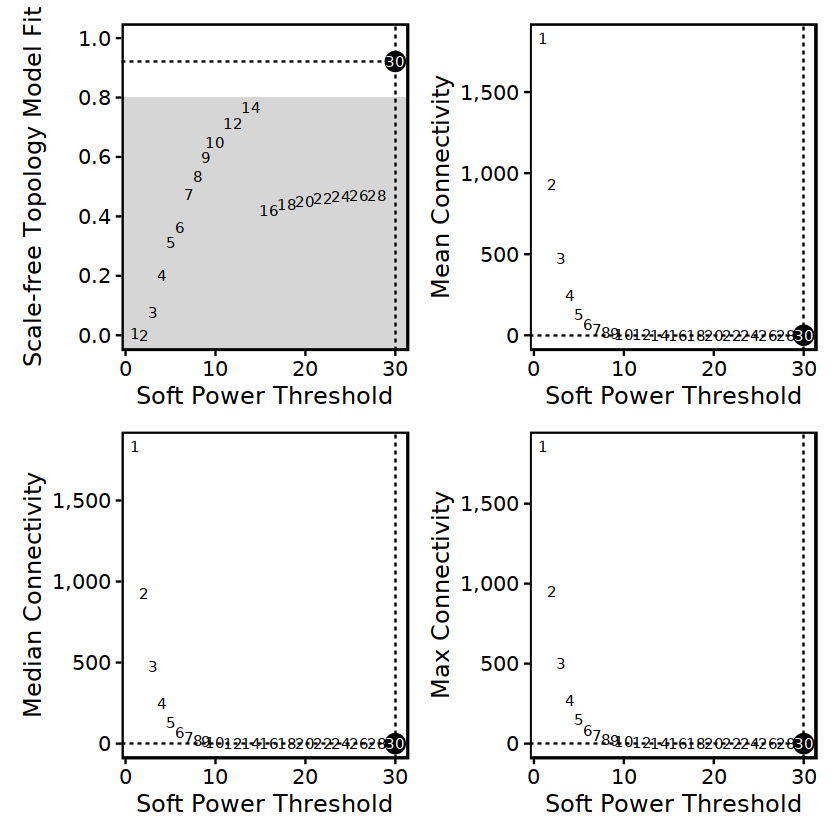

In [115]:
# plot the results:
plot_list <- PlotSoftPowers(seurat_obj)
wrap_plots(plot_list, ncol=2)

In [116]:
# Save the fully processed Seurat object to be used in all the other notebooks
saveRDS(seurat_obj, file=file.path(OUT, paste0(NAME, "_hdWGCNA.rds")))

# DONE!

---

# Scratch